____
# Análise do Perfil dos óbitos por Covid-19 na Paraíba
____

## Autor: Flávio Macaúbas Torres Filho

### Laboratório de Inteligência Artificial e Macroeconomia Computacional - LABIMEC

Análise descritiva e exploratória das informações de óbitos do estado da Paraíba, a base de dados é atualizada e mantida pelo próprio autor. O próposito da investigação é identificar as principais comorbidades dos óbitos por Covid-19 no Estado da Paraíba, percentual de óbitos que tinham e não tinham comorbidades, análise da idade dos óbitos, local do óbito, gênero do óbito, tempo médio entre início dos sintomas e óbito e tempo médio entre a data do óbito e a data da notificação pela Secretaria Estadual de Saúde do Estado da Paraíba

* Base categorizada nos campos: 
<ul> 
    <li>  <b>data_inicio:</b> data ao qual os sintomas começaram - <b>Tipo:</b> Timestamp - <b>Valor:</b> data formato YYYY/MM/DD</li>
    <li>  <b>data_obito:</b> data ao qual o paciente veio a óbito - <b>Tipo:</b> Timestamp - <b>Valor:</b> data formato YYYY/MM/DD</li>
    <li>  <b>cidade:</b> cidade originária do paciente (apenas cidades do território do estado da Paraíba) - <b>Tipo:</b> String (UTF-8)</li>
    <li>  <b>genero:</b> gênero do paciente - <b>Tipo:</b> String - <b>Valor:</b> homem ou mulher </li>
    <li>  <b>diabetes:</b> se o óbito tinha qualquer tipo de diabetes - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>hipertensao:</b> se o óbito hipertensao - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>cardiaco:</b> se o óbito tinha qualquer tipo cardiopatia - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>cancer:</b> se o óbito tinha qualquer tipo de neoplasias - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>neurologica:</b> se o óbito tinha qualquer tipo de doenças neurológicas (acidentes vasculares cerebrais inclusos) - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>obesidade:</b> se o óbito era obeso - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>respiratorias:</b> se o óbito tinha qualquer tipo de doenças respitarória - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>tabagismo:</b> se o óbito era fumante ou ex-fumante - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>outras:</b> se o óbito tinha todo e qualquer doença não descrita - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>hospital:</b> local de óbito da vítima - <b>Tipo:</b> String (UTF-8) - <b>Valor:</b> Público, privado, residência e transporte</li>
    <li>  <b>data_obito:</b> data ao qual o óbito foi notificado pela Secretaria de Saúde do Estado da Paraíba - <b>Tipo:</b> Timestamp - <b>Valor:</b> data formato YYYY/MM/DD</li>
    <li>  <b>fonte:</b> link no qual as informações foi divulgada no site do Governo do Estado da Paraíba - <b>Tipo:</b> String
<\ul>

In [751]:
# Importnado módulos necessários

import pandas as pd # Pandas para manipulação de dataframes
from dfply import * # Importação dos módulos necessário para trabalhar com pipe em Python
import numpy as np # Operações matemáticas
import matplotlib.dates as mdates # Arrumar as datas no eixo

# Visualização dos dados
import seaborn as sns 
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline

In [752]:
# Leitura da base dados
df = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/perfil_paraiba.csv')

### Informações gerais da base de dados

In [753]:
# Informações dos campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 17 columns):
data_inicio       2338 non-null object
data_obito        2382 non-null object
cidade            2381 non-null object
genero            2382 non-null object
idade             2382 non-null float64
diabetes          2382 non-null object
hipertenso        2382 non-null object
cardiaco          2382 non-null object
cancer            2382 non-null object
neurologica       2382 non-null object
obesidade         2382 non-null object
respiratorias     2382 non-null object
tabagismo         2382 non-null object
outras            2382 non-null object
hospital          2378 non-null object
data_notificao    2382 non-null object
fonte             2382 non-null object
dtypes: float64(1), object(16)
memory usage: 316.4+ KB


In [754]:
# 5 primeiros elementos
df.head(5)

,data_inicio,data_obito,cidade,genero,idade,diabetes,hipertenso,cardiaco,cancer,neurologica,obesidade,respiratorias,tabagismo,outras,hospital,data_notificao,fonte
0,2020-03-26,2020-03-31,Patos,homem,36.0,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Privado,2020-03-31,https://paraiba.pb.gov.br/diretas/saude/corona...
1,2020-03-25,2020-04-04,Junco do Seridó,mulher,86.0,Sim,Não,Não,Não,Não,Não,Não,Não,Sim,Público,2020-04-03,https://paraiba.pb.gov.br/diretas/saude/corona...
2,2020-03-28,2020-04-02,João Pessoa,homem,43.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-04-03,https://paraiba.pb.gov.br/diretas/saude/corona...
3,2020-02-04,2020-04-04,João Pessoa,mulher,88.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-04-05,https://paraiba.pb.gov.br/diretas/saude/corona...
4,NaN,2020-03-30,Cabedelo,homem,71.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-04-08,https://paraiba.pb.gov.br/diretas/saude/corona...


In [755]:
# 5 últimos elementos
df.tail(5)

,data_inicio,data_obito,cidade,genero,idade,diabetes,hipertenso,cardiaco,cancer,neurologica,obesidade,respiratorias,tabagismo,outras,hospital,data_notificao,fonte
2377,2020-06-22,2020-07-09,Lagoa Seca,mulher,109.0,Não,Não,Não,Não,Não,Não,Não,Não,Não,Público,2020-08-27,https://paraiba.pb.gov.br/diretas/saude/corona...
2378,2020-06-20,2020-07-02,Lagoa Seca,mulher,80.0,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Público,2020-08-27,https://paraiba.pb.gov.br/diretas/saude/corona...
2379,2020-06-15,2020-06-25,João Pessoa,homem,95.0,Não,Não,Não,Não,Não,Não,Não,Não,Não,Privado,2020-08-27,https://paraiba.pb.gov.br/diretas/saude/corona...
2380,2020-06-03,2020-06-24,Rio Tinto,homem,75.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-08-27,https://paraiba.pb.gov.br/diretas/saude/corona...
2381,2020-04-28,2020-05-05,João Pessoa,homem,45.0,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Público,2020-08-27,https://paraiba.pb.gov.br/diretas/saude/corona...


### Removendo dados ausente

In [756]:
# Dados ausentes por campo
df.isnull().sum()

data_inicio       44
data_obito         0
cidade             1
genero             0
idade              0
diabetes           0
hipertenso         0
cardiaco           0
cancer             0
neurologica        0
obesidade          0
respiratorias      0
tabagismo          0
outras             0
hospital           4
data_notificao     0
fonte              0
dtype: int64

In [757]:
# O parâmetro 'any' significa que qualquer linha que tenha pelo menos 1 valor ausente, será descartada.
df = df.dropna(how = 'any')

In [758]:
# Dados ausentes por campo após retirada
df.isnull().sum()

data_inicio       0
data_obito        0
cidade            0
genero            0
idade             0
diabetes          0
hipertenso        0
cardiaco          0
cancer            0
neurologica       0
obesidade         0
respiratorias     0
tabagismo         0
outras            0
hospital          0
data_notificao    0
fonte             0
dtype: int64

### Tratamento das datas

In [759]:
# Transformando
df['data_inicio'], df['data_obito'], df['data_notificao'] = pd.to_datetime(df['data_inicio']), pd.to_datetime(df['data_obito']), pd.to_datetime(df['data_notificao'])

In [760]:
# Verificando
df[['data_inicio', 'data_obito', 'data_notificao']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 2381
Data columns (total 3 columns):
data_inicio       2337 non-null datetime64[ns]
data_obito        2337 non-null datetime64[ns]
data_notificao    2337 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 73.0 KB


### Configuraçoes globais

In [761]:
# Configurações globais
sns.set_style('darkgrid') # background
sns.set_context('paper') # Formato artigo
sns.set_palette("deep")
plt.tight_layout()
# Parametros e rcParams vai setar configurações globais para os gráficos, ela serve também como mecanismo de controle
parametros = {'legend.fontsize': 15,
          'figure.figsize': (15,7)}
plt.rcParams.update(parametros)

<Figure size 432x288 with 0 Axes>

In [762]:
### Funções

def coloca_anotacoes(graf, df, coluna = 0, local = 0):
    i=0
    for p in graf.patches:
        height = p.get_height()
        graf.text(p.get_x()+p.get_width()/2., height + local,
            df[coluna][i],ha="center", fontsize = 15)
        i += 1

### Curiosidade

In [763]:
len(df >> mask( (X.idade >= 12 )  & (X.idade < 18)))

0

In [764]:
len(df >> mask( (X.idade >= 60) ))

1717

In [765]:
df['idade'].min()

0.02

## Paraíba

In [766]:
# Número de óbitos
print('Número de óbitos:', len(df))

Número de óbitos: 2337


### Local do óbito

In [767]:
# Calcula a quantidade de pessoas por local de óbito e suas respectivas porcentagens
local_obito = df >> group_by('hospital') >> summarize (quantidade = n(X.hospital)) >> mutate(participacao = X.quantidade * 100 / len(df))
local_obito['participacao'] = local_obito['participacao'].apply(lambda X: "{:.2f}%".format(X))
local_obito

,hospital,quantidade,participacao
0,Privado,206,8.81%
1,Público,2084,89.17%
2,Residência,46,1.97%
3,Transporte,1,0.04%


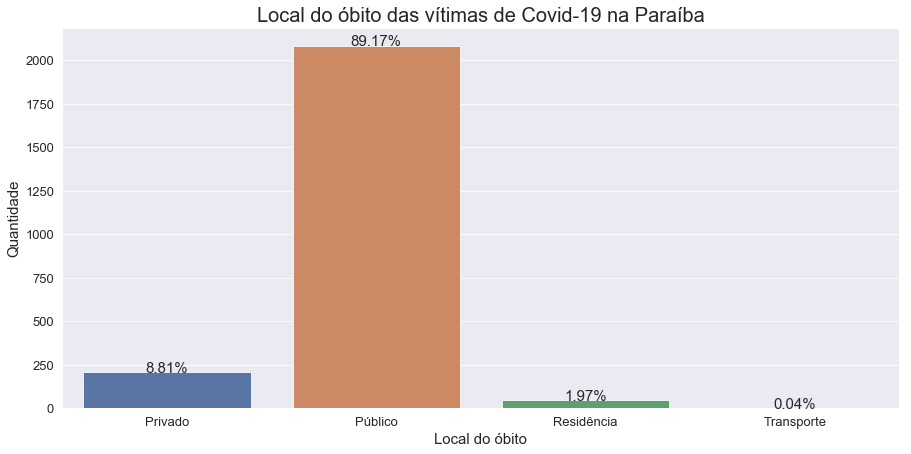

In [768]:
# Visualizando dados
graf = sns.barplot(x='hospital', y = 'quantidade', data=local_obito)
graf.axes.set_title("Local do óbito das vítimas de Covid-19 na Paraíba",fontsize=20) # título
graf.set_xlabel("Local do óbito",fontsize=15) # Label do eixo x
graf.set_ylabel("Quantidade",fontsize=15) # label do eixo y
graf.tick_params(labelsize=13) # tamanho dos valores dos eixos

# Coloca as anotações
coloca_anotacoes(graf, local_obito, coluna = 'participacao')

plt.savefig('po_graf\local.png')

### Gênero

In [769]:
genero = df >> group_by('genero') >> summarize(qnt_gen = n(X.genero)) >> mutate(perc_genero = X.qnt_gen * 100 /len(df))
genero['perc_genero'] = genero['perc_genero'].apply(lambda X: '{:.1f}%'.format(X))
genero

,genero,qnt_gen,perc_genero
0,homem,1318,56.4%
1,mulher,1019,43.6%


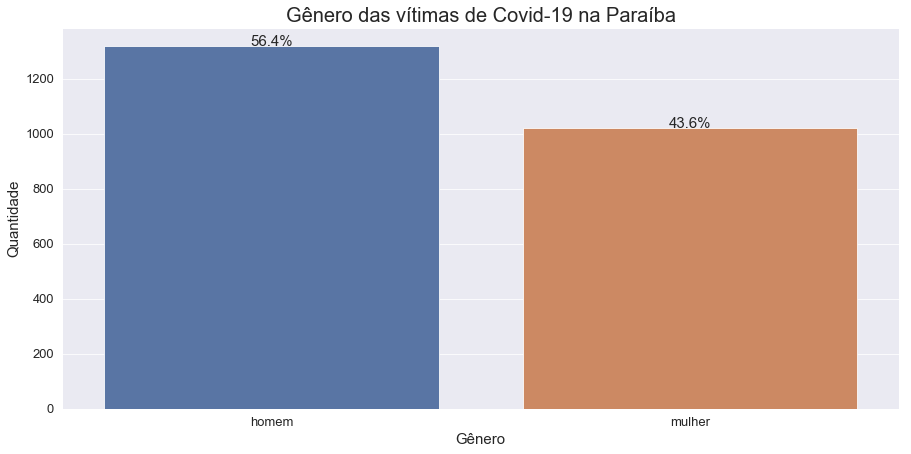

In [770]:
# Visualizando dados
graf = sns.countplot(x='genero',data=df)
graf.axes.set_title("Gênero das vítimas de Covid-19 na Paraíba",fontsize=20) # título
graf.set_xlabel("Gênero",fontsize=15) # Label do eixo x
graf.set_ylabel("Quantidade",fontsize=15) # label do eixo y
graf.tick_params(labelsize=13)

# Coloca as anotações
coloca_anotacoes(graf, genero, coluna = 'perc_genero', local = 1)

plt.savefig('po_graf\genero.png')

### Idade

In [771]:
print('Idade média: {:.1f}'.format(df['idade'].mean()))

Idade média: 68.8


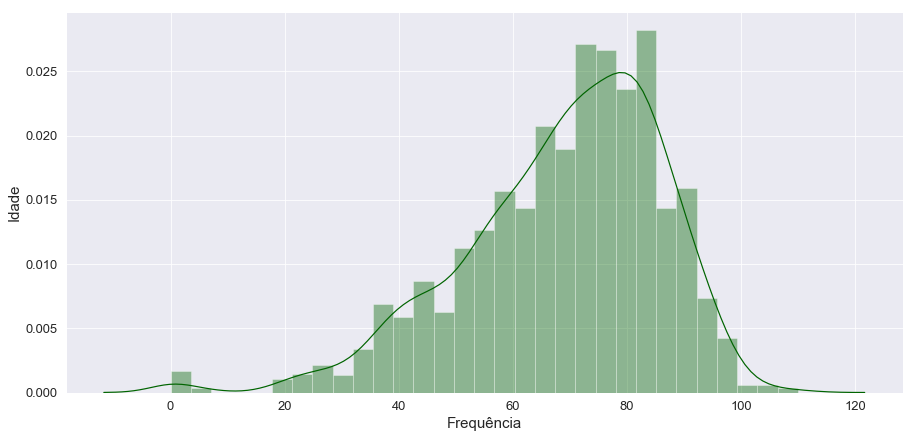

In [772]:
# Visualizando dados
graf = sns.distplot(df['idade'], color='darkgreen')
#graf.axes.set_title("Distribuição da idade das vítimas de Covid-19 na Paraíba",fontsize=20) # título
graf.set_xlabel("Frequência",fontsize=15) # Label do eixo x
graf.set_ylabel("Idade",fontsize=15) # label do eixo y
graf.tick_params(labelsize=13)

plt.savefig('po_graf\idade.png')

In [773]:
# Cálcula das vítimas que tinham idade maior igual e menor a 60 anos

idade_60_maior = df >> summarize(total = n(X.idade))
idade_60_maior['maior_60'] = df >> mask(X.idade >= 60) >> summarize(maior_60 = n(X.idade))
idade_60_maior = idade_60_maior >> mutate(menor_60 = X.total - X.maior_60) >> mutate(part_60_maior = X.maior_60 * 100 /X.total) >> mutate(part_60_menor = X.menor_60 * 100 /X.total)

for coluna in ['part_60_maior', 'part_60_menor']:
    idade_60_maior[coluna] = idade_60_maior[coluna].apply(lambda X: "{:.1f}%".format(X))
    
idade_60_maior


,total,maior_60,menor_60,part_60_maior,part_60_menor
0,2337,1717,620,73.5%,26.5%


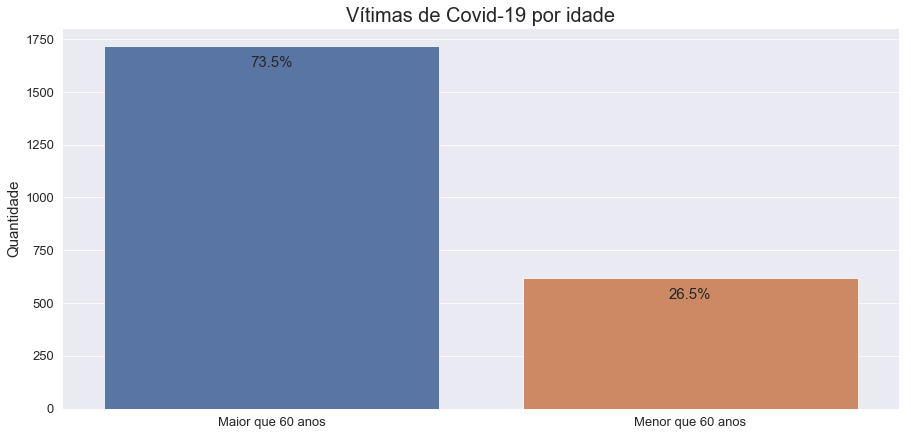

In [774]:
# Visualizando dados
graf = sns.barplot(y = [idade_60_maior['maior_60'].values[0], idade_60_maior['menor_60'].values[0]], x = ["Maior que 60 anos", "Menor que 60 anos"])
graf.axes.set_title("Vítimas de Covid-19 por idade",fontsize=20) # título
graf.set_ylabel("Quantidade",fontsize=15) # label do eixo y
graf.tick_params(labelsize=13)

# Coloca as anotações
i= 0
for p in graf.patches:
    height = p.get_height()
    if i == 0:
        graf.text(p.get_x()+p.get_width()/2., height - 100,
            idade_60_maior['part_60_maior'][0],ha="center", fontsize = 15)
    else:
        graf.text(p.get_x()+p.get_width()/2., height - 100,
            idade_60_maior['part_60_menor'][0],ha="center", fontsize = 15)
    i += 1

plt.savefig('po_graf\maior_60.png')

### Comorbidade

In [775]:
tem_comorbidade = len(df >> mask((X.diabetes == 'Sim') |
               (X.hipertenso == 'Sim') |
               (X.cardiaco == 'Sim') |
               (X.cancer == 'Sim') |
               (X.neurologica == 'Sim') |
               (X.obesidade == 'Sim') |
               (X.respiratorias == 'Sim') |
               (X.tabagismo == 'Sim') |
               (X.outras == 'Sim')))

nao_informou = len(df >> mask(X.outras == 'SI'))

print('Quantidade de pessoas que tem comorbidades: {} \nQuantidade de pessoas que não foi informado: {} \nQuantidade de pessoas que não tinham: {}'.format(
    tem_comorbidade,
    nao_informou, 
    len(df) - tem_comorbidade - nao_informou))

print('\n')

perc_comorbidade = tem_comorbidade*100/len(df)
perc_nao_info = nao_informou*100/len(df)

print('Percentual de pessoas que tem comorbidades: {:.1f}% \nPercentual de pessoas que não informou: {:.1f}% \nPercentual de pessoas que não tem comorbidades: {:.1f}%'.format(perc_comorbidade, 
                                                                                                                             perc_nao_info, 
                                                                                                                             100 - perc_comorbidade - perc_nao_info ))

Quantidade de pessoas que tem comorbidades: 1727 
Quantidade de pessoas que não foi informado: 279 
Quantidade de pessoas que não tinham: 331


Percentual de pessoas que tem comorbidades: 73.9% 
Percentual de pessoas que não informou: 11.9% 
Percentual de pessoas que não tem comorbidades: 14.2%


In [776]:
# Calculando quantidade
comorbidade_pb = df >> summarize( qnt_total = n(X.diabetes) )

comorbidade_pb['diabetes'] = (df >> mask(X.diabetes == 'Sim') >> summarize( qnt = n(X.diabetes) )).values
comorbidade_pb['hipertenso'] = (df >> mask(X.hipertenso == 'Sim') >> summarize( qnt = n(X.hipertenso) )).values
comorbidade_pb['cardiaco'] = (df >> mask(X.cardiaco == 'Sim') >> summarize( qnt = n(X.cardiaco) )).values
comorbidade_pb['cancer'] = (df >> mask(X.cancer == 'Sim') >> summarize( qnt = n(X.cancer) )).values
comorbidade_pb['neurologica'] = (df >> mask(X.neurologica == 'Sim') >> summarize( qnt = n(X.neurologica) )).values
comorbidade_pb['obesidade'] = (df >> mask(X.obesidade == 'Sim') >> summarize( qnt = n(X.obesidade) )).values
comorbidade_pb['respiratorias'] = (df >> mask(X.respiratorias == 'Sim') >> summarize( qnt = n(X.respiratorias) )).values
comorbidade_pb['tabagismo'] = (df >> mask(X.tabagismo == 'Sim') >> summarize( qnt = n(X.tabagismo) )).values
comorbidade_pb['outras'] = (df >> mask(X.outras == 'Sim') >> summarize( qnt = n(X.outras) )).values
comorbidade_pb['nao_informada'] = (df >> mask(X.outras == 'SI') >> summarize( qnt = n(X.outras) )).values


comorbidade_pb

,qnt_total,diabetes,hipertenso,cardiaco,cancer,neurologica,obesidade,respiratorias,tabagismo,outras,nao_informada
0,2337,784,770,526,54,188,134,153,97,275,279


In [777]:
# Calculando percentual
comorbidade_pb_perc = (comorbidade_pb >>
  mutate(diabetes = X.diabetes * 100 / X.qnt_total) >> 
  mutate(hipertenso = X.hipertenso * 100 / X.qnt_total) >>
  mutate(cardiaco = X.cardiaco * 100 / X.qnt_total) >>
  mutate(cancer = X.cancer * 100 / X.qnt_total) >>
  mutate(neurologica = X.neurologica * 100 / X.qnt_total) >>
  mutate(obesidade = X.obesidade * 100 / X.qnt_total) >>
  mutate(respiratorias = X.respiratorias * 100 / X.qnt_total) >>
  mutate(tabagismo = X.tabagismo * 100 / X.qnt_total) >>
  mutate(outras = X.outras * 100 / X.qnt_total) >>
  mutate(nao_informada = X.nao_informada * 100 / X.qnt_total) ) >> select(columns_to(X.nao_informada, inclusive=True)) >> drop(X.qnt_total)

for coluna in comorbidade_pb_perc.columns:
    comorbidade_pb_perc[coluna] = comorbidade_pb_perc[coluna].apply(lambda X: "{:.1f}%".format(X))
    
comorbidade_pb_perc

,diabetes,hipertenso,cardiaco,cancer,neurologica,obesidade,respiratorias,tabagismo,outras,nao_informada
0,33.5%,32.9%,22.5%,2.3%,8.0%,5.7%,6.5%,4.2%,11.8%,11.9%


In [778]:
pd.concat([comorbidade_pb,comorbidade_pb_perc], axis=0, sort = False)

,qnt_total,diabetes,hipertenso,cardiaco,cancer,neurologica,obesidade,respiratorias,tabagismo,outras,nao_informada
0,2337.0,784,770,526,54,188,134,153,97,275,279
0,NaN,33.5%,32.9%,22.5%,2.3%,8.0%,5.7%,6.5%,4.2%,11.8%,11.9%


### Exemplo de gráfico para uma comorbidade (não é particularmente últil no tipo de análise que estou fazendo)

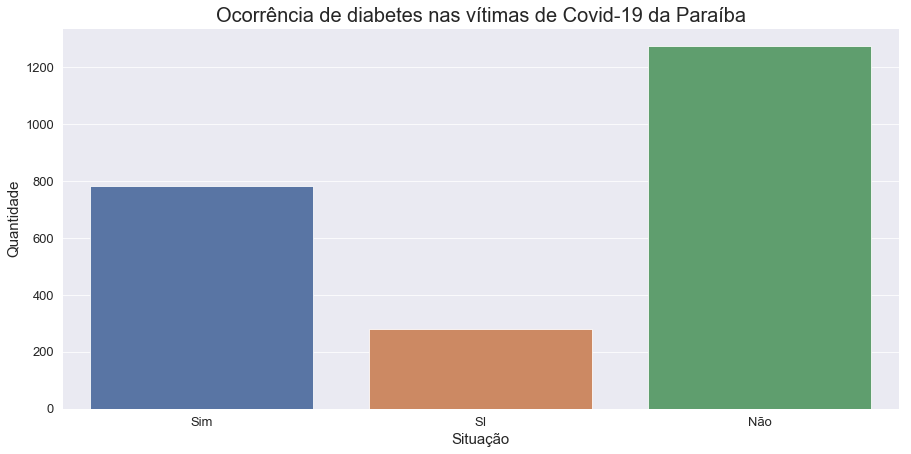

In [779]:
# Visualizando dados
graf = sns.countplot(df['diabetes'])
graf.axes.set_title("Ocorrência de diabetes nas vítimas de Covid-19 da Paraíba",fontsize=20) # título
graf.set_ylabel("Quantidade",fontsize=15) # label do eixo y
graf.set_xlabel("Situação",fontsize=15) # label do eixo y
graf.tick_params(labelsize=13)

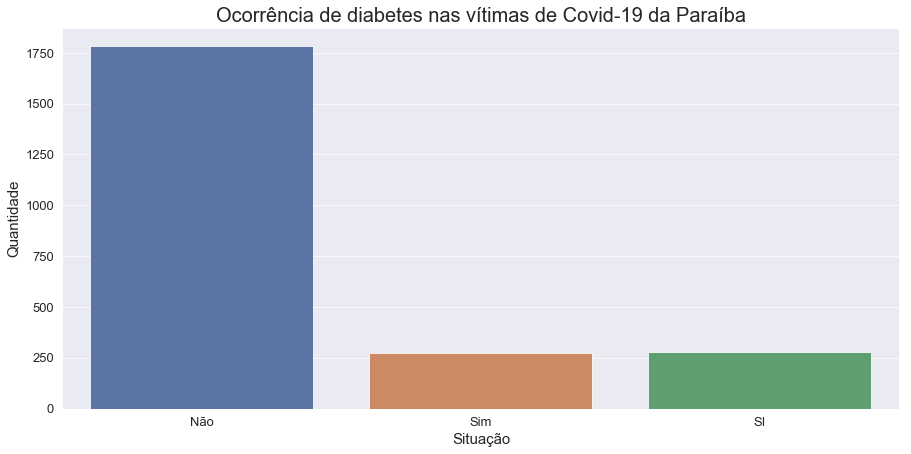

In [780]:
# Visualizando dados
graf = sns.countplot(df['outras'])
graf.axes.set_title("Ocorrência de diabetes nas vítimas de Covid-19 da Paraíba",fontsize=20) # título
graf.set_ylabel("Quantidade",fontsize=15) # label do eixo y
graf.set_xlabel("Situação",fontsize=15) # label do eixo y
graf.tick_params(labelsize=13)

### Tempo médio do início dos sintomas até o óbito

In [781]:
df = df >> mutate(diff_sint_obito = X.data_obito - X.data_inicio)
df = df >> mutate(diff_obito_noti = X.data_notificao - X.data_obito)

In [782]:
(df >> select('diff_sint_obito')).mean()

diff_sint_obito   15 days 05:41:58.613607
dtype: timedelta64[ns]

### Tempo médio entre o óbito e a notificação pela SES

In [783]:
(df >> select('diff_obito_noti')).mean()

diff_obito_noti   15 days 18:45:45.057766
dtype: timedelta64[ns]

### Comorbidade por faixa etária

In [784]:
# Função para descrever por faixa etária
def comorbidades_por_faixa_etaria(df, limite_inferior, limite_superior):
        
    print('DE', limite_inferior,'A', limite_superior,'\n')
        
    faixa_etaria = df.loc[(df['idade'] >= limite_inferior) & (df['idade'] <= limite_superior)]

    qnt_total = faixa_etaria['genero'].count()
    qnt_homens = faixa_etaria['genero'].loc[faixa_etaria['genero'] == 'homem'].count()
    qnt_mulheres = faixa_etaria['genero'].loc[faixa_etaria['genero'] == 'mulher'].count()
    perc_homem = qnt_homens/qnt_total
    perc_mulher = qnt_mulheres/qnt_total



    print('Quantidade total: {}\nQuantidade homens: {}\nQuantidade mulheres: {}\n'.format(qnt_total, 
                                                                                          qnt_homens,
                                                                                          qnt_mulheres)) 

    print('Percentual de homens: {:.1f}%\nPercentual de mulheres: {:.1f}%\n'.format(perc_homem*100, perc_mulher*100))

    print('Quantidade de óbitos com diabetes: {}\nPercentual de diabéticos: {:.1f}%\n'.format(faixa_etaria['diabetes'].loc[faixa_etaria['diabetes'] == 'Sim'].count(),
                                                                                                faixa_etaria['diabetes'].loc[faixa_etaria['diabetes'] == 'Sim'].count()* 100/faixa_etaria['diabetes'].count()))
    print('Quantidade de óbitos com hipertensão: {}\nPercentual de hipertensos: {:.1f}%\n'.format(faixa_etaria['hipertenso'].loc[faixa_etaria['hipertenso'] == 'Sim'].count(),
                                                                                                    faixa_etaria['hipertenso'].loc[faixa_etaria['hipertenso'] == 'Sim'].count()* 100/faixa_etaria['hipertenso'].count()))
    print('Quantidade de óbitos cardíacos: {}\nPercentual de cardíacos: {:.1f}%\n'.format(faixa_etaria['cardiaco'].loc[faixa_etaria['cardiaco'] == 'Sim'].count(),
                                                                                                faixa_etaria['cardiaco'].loc[faixa_etaria['cardiaco'] == 'Sim'].count()* 100/faixa_etaria['cardiaco'].count()))
    print('Quantidade de óbitos fumantes: {}\nPercentual de fumantes: {:.1f}%\n'.format(faixa_etaria['tabagismo'].loc[faixa_etaria['tabagismo'] == 'Sim'].count(),
                                                                                                faixa_etaria['tabagismo'].loc[faixa_etaria['tabagismo'] == 'Sim'].count()* 100/faixa_etaria['tabagismo'].count()))
    print('Quantidade de óbitos com doenças neurológicas: {}\nPercentual de doenças neurológicas: {:.1f}%\n'.format(faixa_etaria['neurologica'].loc[faixa_etaria['neurologica'] == 'Sim'].count(),
                                                                                                faixa_etaria['neurologica'].loc[faixa_etaria['neurologica'] == 'Sim'].count()* 100/faixa_etaria['neurologica'].count()))
    print('Quantidade de óbitos com obesidade: {}\nPercentual de obesidade: {:.1f}%\n'.format(faixa_etaria['obesidade'].loc[faixa_etaria['obesidade'] == 'Sim'].count(),
                                                                                                faixa_etaria['obesidade'].loc[faixa_etaria['obesidade'] == 'Sim'].count()* 100/faixa_etaria['obesidade'].count()))
    
    print('Quantidade de óbitos com doenças respiratórias: {}\nPercentual de doenças respiratórias: {:.1f}%\n'.format(faixa_etaria['respiratorias'].loc[faixa_etaria['respiratorias'] == 'Sim'].count(),
                                                                                                faixa_etaria['respiratorias'].loc[faixa_etaria['respiratorias'] == 'Sim'].count()* 100/faixa_etaria['respiratorias'].count()))
    
    print('Quantidade de óbitos com cancer: {}\nPercentual de cancer: {:.1f}%\n'.format(faixa_etaria['cancer'].loc[faixa_etaria['cancer'] == 'Sim'].count(),
                                                                                                faixa_etaria['cancer'].loc[faixa_etaria['cancer'] == 'Sim'].count()* 100/faixa_etaria['cancer'].count()))
    
    print('Quantidade de óbitos com outras comorbidades: {}\nPercentual de outras comorbidades: {:.1f}%\n'.format(faixa_etaria['outras'].loc[faixa_etaria['outras'] == 'Sim'].count(),
                                                                                                faixa_etaria['outras'].loc[faixa_etaria['outras'] == 'Sim'].count()* 100/faixa_etaria['outras'].count()))
    
    print('Quantidade de óbitos com comorbidades não informada: {}\nPercentual de comorbidades não informada: {:.1f}%\n'.format( faixa_etaria['diabetes'].loc[faixa_etaria['diabetes'] == 'SI'].count(),
                                                                                                faixa_etaria['diabetes'].loc[faixa_etaria['diabetes'] == 'SI'].count() * 100 / faixa_etaria['diabetes'].count() ) )

In [785]:
comorbidades_por_faixa_etaria(df, 0, 19)
comorbidades_por_faixa_etaria(df, 20, 29)
comorbidades_por_faixa_etaria(df, 30, 39)
comorbidades_por_faixa_etaria(df, 40, 49)
comorbidades_por_faixa_etaria(df, 50, 59)
comorbidades_por_faixa_etaria(df, 60, 69)
comorbidades_por_faixa_etaria(df, 70, 79)
comorbidades_por_faixa_etaria(df, 80, 89)
comorbidades_por_faixa_etaria(df, 90, 1000)

DE 0 A 19 

Quantidade total: 20
Quantidade homens: 12
Quantidade mulheres: 8

Percentual de homens: 60.0%
Percentual de mulheres: 40.0%

Quantidade de óbitos com diabetes: 1
Percentual de diabéticos: 5.0%

Quantidade de óbitos com hipertensão: 2
Percentual de hipertensos: 10.0%

Quantidade de óbitos cardíacos: 3
Percentual de cardíacos: 15.0%

Quantidade de óbitos fumantes: 0
Percentual de fumantes: 0.0%

Quantidade de óbitos com doenças neurológicas: 3
Percentual de doenças neurológicas: 15.0%

Quantidade de óbitos com obesidade: 0
Percentual de obesidade: 0.0%

Quantidade de óbitos com doenças respiratórias: 0
Percentual de doenças respiratórias: 0.0%

Quantidade de óbitos com cancer: 0
Percentual de cancer: 0.0%

Quantidade de óbitos com outras comorbidades: 4
Percentual de outras comorbidades: 20.0%

Quantidade de óbitos com comorbidades não informada: 3
Percentual de comorbidades não informada: 15.0%

DE 20 A 29 

Quantidade total: 36
Quantidade homens: 22
Quantidade mulheres: 14

## Análise 5 cidades com mais óbitos

In [786]:
# Juntando cidade para análise
df_5_cidades = (
    df >> mask((X.cidade == 'João Pessoa') | 
               (X.cidade == 'Campina Grande') | 
               (X.cidade == 'Santa Rita') | 
               (X.cidade == 'Bayeux') | 
               (X.cidade == 'Patos'))
) 

### Gênero

In [787]:
# Calcula total
genero = df >> group_by('cidade') >> summarize(total_gen = n(X.genero)) >> ungroup() >> arrange(X.total_gen, ascending = False) >> head(5)

# Calcula específico
homens = df >> group_by('cidade') >> mask(X.genero == 'homem') >> summarize(qnt_hom = n(X.genero)) >> ungroup() >> arrange(X.qnt_hom, ascending = False)
mulheres = df >> group_by('cidade') >> mask(X.genero == 'mulher') >> summarize(qnt_mul = n(X.genero)) >> ungroup() >> arrange(X.qnt_mul, ascending = False) 

# Leftjoin das bases de dados
genero = genero >> left_join(homens, by = 'cidade') >> left_join(mulheres, by = 'cidade')

# Calcula % dos gêneros
genero = genero >> mutate(perc_hom = X.qnt_hom * 100 / X.total_gen) >> mutate(perc_mul = X.qnt_mul * 100 / X.total_gen)

# Ajusta valores de porcentagem para formato mais amigável
for coluna in ['perc_hom', 'perc_mul']:
    genero[coluna] = genero[coluna].apply(lambda X: "{:.1f}%".format(X))
    
genero

,cidade,total_gen,qnt_hom,qnt_mul,perc_hom,perc_mul
0,João Pessoa,787,465,322,59.1%,40.9%
1,Campina Grande,292,160,132,54.8%,45.2%
2,Santa Rita,133,74,59,55.6%,44.4%
3,Bayeux,93,52,41,55.9%,44.1%
4,Patos,78,42,36,53.8%,46.2%


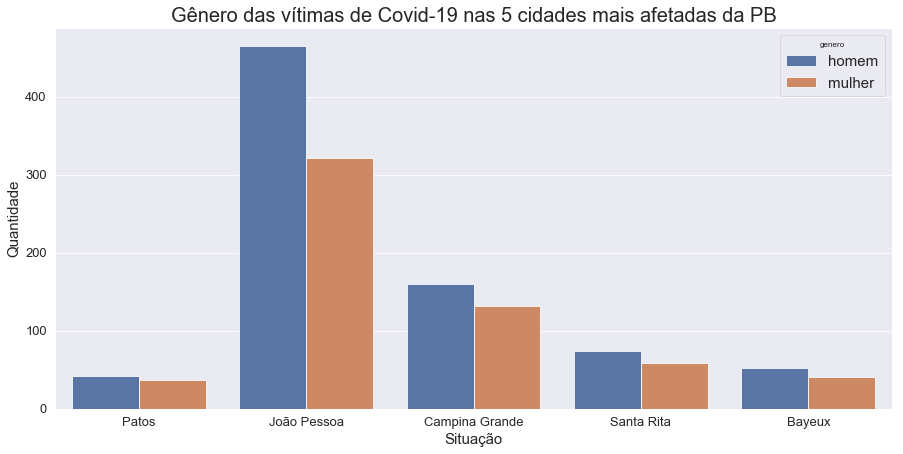

In [788]:
graf = sns.countplot(df_5_cidades.cidade, hue = df_5_cidades.genero)
graf.axes.set_title("Gênero das vítimas de Covid-19 nas 5 cidades mais afetadas da PB",fontsize=20) # título
graf.set_ylabel("Quantidade",fontsize=15) # label do eixo y
graf.set_xlabel("Situação",fontsize=15) # label do eixo y
graf.tick_params(labelsize=13)

### Idade

In [789]:
# Calcula quantidade de vítimas por cidade
idades = (df >> group_by('cidade')
 >> summarize(idade_min = X.idade.min(), idade_max = X.idade.max(), media_idade = np.mean(X.idade), quantidade = n(X.cidade)) 
 #>> summarize(participacao = X.quantidade_cidade / X.quantidade_total)
 >> ungroup() 
 >> arrange(X.quantidade, ascending = False) 
 >> head(5))

# Calcula quantidade de vítimas com mais de 60 anos por cidade
idades['qnt_maior_60'] = (df >> group_by('cidade')
                             >> mask(X.idade >= 60) 
                             >> summarize(quantidade = n(X.cidade)) 
                             >> ungroup() 
                             >> arrange(X.quantidade, ascending = False) 
                             >> head(5) 
                             >> select(X.quantidade)).values

# Calcula participação por cidade
idades = (idades >> mutate(perc_maior_60 = X.qnt_maior_60*100/X.quantidade) >> mutate(perc_menor_60 = 100 - X.perc_maior_60))

# Ajusta valores pra formato mais amigável - NÃO RECOMENDADO SE VOCÊ PRETENDE QUE OUTRAS PESSOAS TRABALHE COM OS VALORES DESSA BASE DE DADOS
idades['media_idade'] = idades['media_idade'].apply(lambda X: "{:.1f}".format(X))
idades['perc_maior_60'] = idades['perc_maior_60'].apply(lambda X: "{:.1f}%".format(X))
idades['perc_menor_60'] = idades['perc_menor_60'].apply(lambda X: "{:.1f}%".format(X))

idades >> mask(X.cidade != 'Bayeux')

,cidade,idade_min,idade_max,media_idade,quantidade,qnt_maior_60,perc_maior_60,perc_menor_60
69,João Pessoa,0.02,110.0,67.7,787,556,70.6%,29.4%
33,Campina Grande,20.00,101.0,69.8,292,223,76.4%,23.6%
120,Santa Rita,20.00,94.0,68.7,133,100,75.2%,24.8%
95,Patos,0.09,98.0,67.6,78,56,71.8%,28.2%


### Local de óbito

In [790]:
# Óbitos por local
local_obito = df >> group_by('cidade') >> summarize(total_local = n(X.hospital)) >> ungroup() >> arrange(X.total_local, ascending = False) >> head(5)

# Local
publico = df >> mask(X.hospital == 'Público') >> group_by('cidade') >> summarize(pub = n(X.hospital)) >> ungroup() >> arrange(X.pub, ascending = False)
privado = df >> mask(X.hospital == 'Privado') >> group_by('cidade') >> summarize(priv = n(X.hospital)) >> ungroup() >> arrange(X.priv, ascending = False)
residencia = df >> mask(X.hospital == 'Residência') >> group_by('cidade') >> summarize(resi = n(X.hospital)) >> ungroup() >> arrange(X.resi, ascending = False)
transporte = df >> mask(X.hospital == 'Transporte') >> group_by('cidade') >> summarize(trans = n(X.hospital)) >> ungroup() >> arrange(X.trans, ascending = False)

# Junta base de dados
local_obito >>= left_join(publico, by='cidade') >> left_join(privado, by='cidade') >> left_join(residencia, by='cidade') >> left_join(transporte, by='cidade') 
local_obito >>= (mutate(perc_pub = X.pub*100/X.total_local) >> 
                 mutate(perc_priv= X.priv*100/X.total_local) >> 
                 mutate(perc_resi = X.resi*100/X.total_local) >> 
                 mutate(perc_trans = X.trans*100/X.total_local)) 

local_obito = local_obito.fillna(0)

for coluna in (local_obito >> select(starts_with('perc'))).columns:
    local_obito[coluna] = local_obito[coluna].apply(lambda X: "{:.1f}%".format(X))

local_obito >> mask(X.cidade != 'Bayeux')

,cidade,total_local,pub,priv,resi,trans,perc_pub,perc_priv,perc_resi,perc_trans
0,João Pessoa,787,641,131,15.0,0.0,81.4%,16.6%,1.9%,0.0%
1,Campina Grande,292,268,24,0.0,0.0,91.8%,8.2%,0.0%,0.0%
2,Santa Rita,133,125,3,5.0,0.0,94.0%,2.3%,3.8%,0.0%
4,Patos,78,76,2,0.0,0.0,97.4%,2.6%,0.0%,0.0%


### Comorbidades

In [791]:
# Calcula o total de óbitos por cidade
comorbidades = (df >> group_by('cidade') >> summarize(total = n(X.cidade)) >> ungroup() >> arrange(X.total, ascending = False) >> head(5))

# Calcula o total de óbitos sem informações de comorbidades
sem_info = (df >> mask(X.diabetes == 'SI') >> group_by('cidade') >> summarize(sem_info = n(X.cidade)) >> ungroup() >> arrange(X.sem_info, ascending = False))

# Junta as bases de dados
comorbidades = comorbidades >> inner_join(sem_info, by = 'cidade')

# Calcula quantidade de óbitos com informações de comorbidades
comorbidades = comorbidades >> mutate(com_info = X.total - X.sem_info)

# Comorbidades
diabetes = (df >> mask(X.diabetes == 'Sim') >> group_by('cidade') >> summarize(qnt_diab = n(X.cidade)) >> ungroup() >> arrange(X.qnt_diab, ascending = False))
hipertenso = (df >> mask(X.hipertenso == 'Sim') >> group_by('cidade') >> summarize(qnt_hiper = n(X.cidade)) >> ungroup() >> arrange(X.qnt_hiper, ascending = False))
cardiaco = (df >> mask(X.cardiaco == 'Sim') >> group_by('cidade') >> summarize(qnt_card = n(X.cidade)) >> ungroup() >> arrange(X.qnt_card, ascending = False))
cancer = (df >> mask(X.cancer == 'Sim') >> group_by('cidade') >> summarize(qnt_cancer = n(X.cidade)) >> ungroup() >> arrange(X.qnt_cancer, ascending = False))
neurologica = (df >> mask(X.neurologica == 'Sim') >> group_by('cidade') >> summarize(qnt_neuro = n(X.cidade)) >> ungroup() >> arrange(X.qnt_neuro, ascending = False))
obesidade = (df >> mask(X.obesidade == 'Sim') >> group_by('cidade') >> summarize(qnt_obesi = n(X.cidade)) >> ungroup() >> arrange(X.qnt_obesi, ascending = False))
respiratorias = (df >> mask(X.respiratorias == 'Sim') >> group_by('cidade') >> summarize(qnt_resp = n(X.cidade)) >> ungroup() >> arrange(X.qnt_resp, ascending = False))
tabagismo = (df >> mask(X.tabagismo == 'Sim') >> group_by('cidade') >> summarize(qnt_taba = n(X.cidade)) >> ungroup() >> arrange(X.qnt_taba, ascending = False))
outras = (df >> mask(X.outras == 'Sim') >> group_by('cidade') >> summarize(qnt_outras = n(X.cidade)) >> ungroup() >> arrange(X.qnt_outras, ascending = False))
nao_info = (df >> mask(X.diabetes == 'SI') >> group_by('cidade') >> summarize(qnt_nao_info = n(X.cidade)) >> ungroup() >> arrange(X.qnt_nao_info, ascending = False))

# Juntando a base de dados - leftjoin para preservar apenas as 5 cidades mais afetadas
for comor in [diabetes, hipertenso, cardiaco, cancer, neurologica, obesidade, respiratorias, tabagismo, outras, nao_info]:
    comorbidades = comorbidades >> left_join(comor, by = 'cidade')
    
# Botando 0 onde for NaN
comorbidades = comorbidades.fillna(0)

comorbidades >> select(X.cidade, starts_with('qnt')) >> mask(X.cidade != 'Bayeux')

,cidade,qnt_diab,qnt_hiper,qnt_card,qnt_cancer,qnt_neuro,qnt_obesi,qnt_resp,qnt_taba,qnt_outras,qnt_nao_info
0,João Pessoa,276,258,177,29.0,73,43,52,28.0,103,110
1,Campina Grande,68,56,83,4.0,16,16,13,13.0,20,42
2,Santa Rita,60,45,37,1.0,10,6,8,5.0,13,8
4,Patos,24,32,4,0.0,3,6,2,0.0,4,16


In [792]:
#Criando dataframe com as participações das comorbidades
comorbidades_perc = comorbidades >> select(X.cidade)

lista_comorbidades = comorbidades.columns[4:]

#Criando as perc de cada comorbidades
for coluna in  lista_comorbidades:
    nome_coluna = 'perc'+coluna[3:]
    comorbidades_perc[nome_coluna] =  comorbidades[coluna] * 100 /comorbidades['com_info']
    
    #Ajustando valor
    comorbidades_perc[nome_coluna] = comorbidades_perc['perc'+coluna[3:]].apply(lambda X: "{:.1f}%".format(X))

comorbidades_perc >> mask(X.cidade != 'Bayeux')

,cidade,perc_diab,perc_hiper,perc_card,perc_cancer,perc_neuro,perc_obesi,perc_resp,perc_taba,perc_outras,perc_nao_info
0,João Pessoa,40.8%,38.1%,26.1%,4.3%,10.8%,6.4%,7.7%,4.1%,15.2%,16.2%
1,Campina Grande,27.2%,22.4%,33.2%,1.6%,6.4%,6.4%,5.2%,5.2%,8.0%,16.8%
2,Santa Rita,48.0%,36.0%,29.6%,0.8%,8.0%,4.8%,6.4%,4.0%,10.4%,6.4%
4,Patos,38.7%,51.6%,6.5%,0.0%,4.8%,9.7%,3.2%,0.0%,6.5%,25.8%


In [793]:
# Caso queria juntar as duas base de dados
#comorbidades >> inner_join(comorbidades_perc, by='cidade')

tem_comorbidade = len(df >> mask((X.diabetes == 'Sim') |
               (X.hipertenso == 'Sim') |
               (X.cardiaco == 'Sim') |
               (X.cancer == 'Sim') |
               (X.neurologica == 'Sim') |
               (X.obesidade == 'Sim') |
               (X.respiratorias == 'Sim') |
               (X.tabagismo == 'Sim') |
               (X.outras == 'Sim')))

nao_informou = len(df >> mask(X.diabetes == 'SI'))

print('Quantidade de pessoas que tem comorbidades: {} \nQuantidade de pessoas que não foi informado: {} \nQuantidade de pessoas que não tinham: {}'.format(
    tem_comorbidade,
    nao_informou, 
    len(df) - tem_comorbidade - nao_informou))

print('\n')

perc_comorbidade = tem_comorbidade*100/len(df)
perc_nao_info = nao_informou*100/len(df)

print('Percentual de pessoas que tem comorbidades: {:.1f}% \nPercentual de pessoas que não informou: {:.1f}% \nPercentual de pessoas que não tem comorbidades: {:.1f}%'.format(perc_comorbidade, 
                                                                                                                             perc_nao_info, 
                                                                                                                             100 - perc_comorbidade - perc_nao_info ))

Quantidade de pessoas que tem comorbidades: 1727 
Quantidade de pessoas que não foi informado: 278 
Quantidade de pessoas que não tinham: 332


Percentual de pessoas que tem comorbidades: 73.9% 
Percentual de pessoas que não informou: 11.9% 
Percentual de pessoas que não tem comorbidades: 14.2%


In [794]:
########## TENHO QUE MELHORAR ESSA PARTE ############

# Tinham pelo menos 1 comorbidade
comorbidade_cidades = df >> group_by(X.cidade) >> summarize(total = n(X.cidade)) >> ungroup() >> arrange(X.total, ascending = False) >> head(5)
qnt_sim = ((df >> group_by(X.cidade) >> 
                         mask((X.diabetes == 'Sim') |
                              (X.hipertenso == 'Sim') |
                              (X.cardiaco == 'Sim') |
                              (X.cancer == 'Sim') |
                              (X.neurologica == 'Sim') |
                              (X.obesidade == 'Sim') |
                              (X.respiratorias == 'Sim') |
                              (X.tabagismo == 'Sim') |
                              (X.outras == 'Sim'))) >> summarize(qnt = n(X.cidade)) >> ungroup() >> arrange(X.qnt, ascending = False))

comorbidade_cidades = comorbidade_cidades >> left_join(qnt_sim, by='cidade')

comorbidade_cidades >>= mutate(perc_comorb = X.qnt*100/X.total)

comorbidade_cidades['perc_comorb'] = comorbidade_cidades['perc_comorb'].apply(lambda X: "{:.1f}%".format(X))

comorbidade_cidades['perc_nao_info'] = comorbidades_perc['perc_nao_info']

comorbidade_cidades >> mask(X.cidade != 'Bayeux')

,cidade,total,qnt,perc_comorb,perc_nao_info
0,João Pessoa,787,583,74.1%,16.2%
1,Campina Grande,292,186,63.7%,16.8%
2,Santa Rita,133,107,80.5%,6.4%
4,Patos,78,48,61.5%,25.8%


### Tempo médio do início do sintomas até o óbito

In [795]:
(df >> group_by('cidade') >> 
 summarize(tempo_medio_sint_obt = X.diff_sint_obito.mean()) >>
 mask((X.cidade == 'João Pessoa') | 
     (X.cidade == 'Campina Grande') |
     (X.cidade == 'Santa Rita') |
     (X.cidade == 'Patos')))

,cidade,tempo_medio_sint_obt
33,Campina Grande,15 days 08:27:56.712328
69,João Pessoa,15 days 11:15:10.292249
95,Patos,14 days 00:55:23.076923
120,Santa Rita,12 days 21:50:04.511278


### Tempo médio do óbito até a notificação

In [796]:
(df >> group_by('cidade') >> 
 summarize(tempo_medio_obt_noti = X.diff_obito_noti.mean()) >>
 mask((X.cidade == 'João Pessoa') | 
     (X.cidade == 'Campina Grande') |
     (X.cidade == 'Santa Rita') |
     (X.cidade == 'Patos') |
     (X.cidade == 'Guarabira') |
     (X.cidade == 'Bayeux')))

,cidade,tempo_medio_obt_noti
17,Bayeux,19 days 13:40:38.709677
33,Campina Grande,17 days 07:13:58.356164
58,Guarabira,12 days 00:00:00
69,João Pessoa,22 days 19:01:45.209656
95,Patos,4 days 23:23:04.615384
120,Santa Rita,17 days 23:38:20.751879
